In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlibpy import linear_regression as lnr
from mlibpy import polynomial_regression as pr
from mlibpy.logistic_regression import *

# Training Dataset

In [2]:
df = pd.read_csv("/datasets/binary_classification_train.csv")
df.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,1,-36.963099,-15.014703,87.100435,101.523360,82.106571,-10.956180,0.592326,-51.919028,-90.650434,...,-81.183744,13.101921,18.051450,-40.606288,-39.697053,-13.870802,173.722987,-17.349169,-82.550844,0
1,2,-43.715674,18.847116,89.543406,-71.319314,35.597052,126.358570,-29.837495,-40.473764,-94.079238,...,-37.848260,7.457352,-77.420742,53.773718,-100.124294,9.870650,11.592519,-106.123605,-92.796421,1
2,3,-30.737550,-63.729643,106.081332,81.773948,112.769976,-12.425351,-29.913286,-41.771200,16.424511,...,-106.610289,5.930143,-30.177083,-138.969234,-56.054914,-12.790661,164.832498,-37.412902,-85.441150,0
3,4,-27.674757,-118.869495,135.605213,99.130189,50.947548,-63.704785,-7.353057,-58.140229,-80.209027,...,-149.056417,3.893419,-74.100869,-47.659832,-48.209817,-36.264323,59.001922,-59.064134,-78.538639,0
4,5,-28.654141,-77.746597,85.215365,50.374774,79.763207,-32.703048,-28.152031,-63.994794,-153.566789,...,-102.731465,11.160205,-13.395073,9.416237,2.649524,-43.578704,52.261888,-66.081738,-80.325110,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          48000 non-null  int64  
 1   Feature_1   48000 non-null  float64
 2   Feature_2   48000 non-null  float64
 3   Feature_3   48000 non-null  float64
 4   Feature_4   48000 non-null  float64
 5   Feature_5   48000 non-null  float64
 6   Feature_6   48000 non-null  float64
 7   Feature_7   48000 non-null  float64
 8   Feature_8   48000 non-null  float64
 9   Feature_9   48000 non-null  float64
 10  Feature_10  48000 non-null  float64
 11  Feature_11  48000 non-null  float64
 12  Feature_12  48000 non-null  float64
 13  Feature_13  48000 non-null  float64
 14  Feature_14  48000 non-null  float64
 15  Feature_15  48000 non-null  float64
 16  Feature_16  48000 non-null  float64
 17  Feature_17  48000 non-null  float64
 18  Feature_18  48000 non-null  float64
 19  Feature_19  48000 non-nul

In [6]:
df.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,...,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000
mean,24000.500000,-32.710080,-86.999504,91.672563,-47.086712,87.381269,62.297793,-18.813825,-39.537948,-134.505325,...,-61.834487,9.778476,-59.388301,142.523377,-25.521858,-35.469499,111.853552,-54.258965,-83.721395,0.318417
std,13856.550797,4.683006,45.569874,38.999670,103.625380,27.225938,100.713818,18.042384,9.904532,56.124747,...,45.125347,5.525134,106.315691,151.672749,51.721065,47.131427,71.640825,30.426690,4.487199,0.465867
min,1.000000,-51.879254,-265.670276,-53.057019,-413.176904,-18.966125,-225.307992,-102.629027,-78.303267,-366.085536,...,-245.906036,-15.153410,-429.550085,-420.281140,-225.096759,-166.928194,-203.680014,-190.911859,-102.684089,0.000000
25%,12000.750000,-35.869749,-117.581636,65.320845,-127.410604,69.087460,-10.379372,-30.998228,-46.234590,-171.351277,...,-92.385159,6.067949,-143.445068,12.701277,-57.115088,-73.377231,76.113131,-70.449974,-86.739460,0.000000
50%,24000.500000,-32.686533,-86.899825,91.719266,-50.100503,87.456718,32.449321,-18.737928,-39.508161,-134.609962,...,-61.694674,9.757631,-62.367283,155.199113,-20.500201,-34.368754,122.773520,-50.657638,-83.721902,0.000000
75%,36000.250000,-29.538983,-56.444277,117.823929,32.095255,105.590800,128.044727,-6.639220,-32.844394,-97.651394,...,-31.194093,13.509303,23.690317,258.540757,10.166224,-3.296290,160.389834,-34.224643,-80.690199,1.000000
max,48000.000000,-12.232001,89.580439,260.437145,308.770327,213.059401,472.584974,59.703593,4.173876,107.093607,...,137.469309,35.302228,301.804130,793.269472,210.871429,143.991276,374.784302,48.825199,-65.080194,1.000000


## Training

In [7]:
X_train = np.array(df.iloc[:44000, 1:21])
m_train, n_train = np.shape(X_train)
(m_train, n_train)

(44000, 20)

In [8]:
y_train = np.array(df.iloc[:44000, 21])
np.shape(y_train)

(44000,)

In [9]:
w = np.random.rand(n_train)
w

array([0.10133232, 0.60485702, 0.0997098 , 0.7812408 , 0.46189322,
       0.76067814, 0.47098853, 0.98117139, 0.34509465, 0.42708639,
       0.8553101 , 0.66177131, 0.16498519, 0.81493071, 0.52704011,
       0.5568238 , 0.92631338, 0.75599667, 0.45458337, 0.16633339])

In [10]:
b = 0

In [11]:
Xn_train, Xmean_train, Xstd_train = lnr.normalize(X_train)
Xn_train[:1]

array([[-0.90927345,  1.57861837, -0.11810717,  1.43769063, -0.1935029 ,
        -0.72775588,  1.07804917, -1.25045151,  0.78271133,  0.85721966,
        -2.08949431, -0.43109587,  0.60239808,  0.72879958, -1.20895489,
        -0.27305303,  0.45907905,  0.86375575,  1.21000097,  0.26092853]])

In [12]:
yhat_train = sigmoid(lnr.predict(Xn_train, w, b))
np.shape(yhat_train)

(44000,)

In [13]:
logistic_cost(y_train, yhat_train)

1.0658203988552886

In [48]:
y = y_train
y_pred = yhat_train

In [49]:
y*np.log(y_pred) + (1-y)*np.log(1-y_pred)

array([-0.02046107, -0.10658596, -0.02996601, ..., -0.02150274,
       -0.07114937, -0.0104246 ])

In [14]:
n_iter = 1000
alpha = 0.5
w, b, cost_history = logistic_gradient_descent(Xn_train, w, b, y_train, n_iter, alpha)

Cost at iteration 0: 1.0658203988552886
Cost at iteration 100: 0.24881436664009285
Cost at iteration 200: 0.24724271502499806
Cost at iteration 300: 0.24708751416588812
Cost at iteration 400: 0.24707076815075626
Cost at iteration 500: 0.24706893122307655
Cost at iteration 600: 0.24706872861179635
Cost at iteration 700: 0.24706870622139188
Cost at iteration 800: 0.24706870374545228
Cost at iteration 900: 0.24706870347160306
Cost at iteration 1000: 0.2470687034413959


In [15]:
cost_history[::n_iter//50]

array([1.0658204 , 0.28407846, 0.25832431, 0.25233424, 0.24998981,
       0.24881437, 0.24814731, 0.24774588, 0.24749741, 0.24734142,
       0.24724272, 0.24717996, 0.24713994, 0.24711437, 0.247098  ,
       0.24708751, 0.24708079, 0.24707647, 0.2470737 , 0.24707191,
       0.24707077, 0.24707003, 0.24706956, 0.24706925, 0.24706906,
       0.24706893, 0.24706885, 0.2470688 , 0.24706876, 0.24706874,
       0.24706873, 0.24706872, 0.24706871, 0.24706871, 0.24706871,
       0.24706871, 0.24706871, 0.2470687 , 0.2470687 , 0.2470687 ,
       0.2470687 , 0.2470687 , 0.2470687 , 0.2470687 , 0.2470687 ,
       0.2470687 , 0.2470687 , 0.2470687 , 0.2470687 , 0.2470687 ])

In [16]:
yhat_train = sigmoid(lnr.predict(Xn_train, w, b))
yhat_train

array([0.02025316, 0.89889778, 0.02952148, ..., 0.0212732 , 0.93132277,
       0.01037045])

In [17]:
y_pred_train = decision(yhat_train)
y_pred_train

array([0, 1, 0, ..., 0, 1, 0])

In [18]:
train_bce = bce(y_train, yhat_train)
train_bce

0.9345909090909091

In [19]:
train_mse = lnr.mse(y_train, yhat_train)
train_mse

0.060943550558750614

In [20]:
train_r2 = lnr.r2_score(y_train, yhat_train)
train_r2

0.7193674162221363

In [21]:
# Confusion Matrix
pd.crosstab(y_train, y_pred_train, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,29052,921
1,1957,12070


In [22]:
F1_train = f1_score(y_train, yhat_train)
F1_train

0.8934784217928788

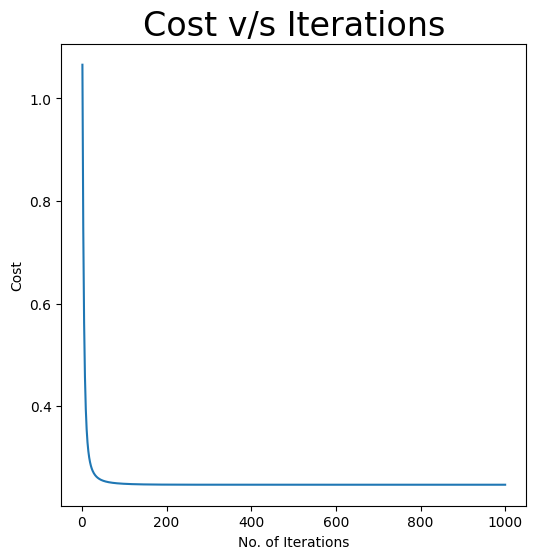

In [23]:
plt.figure(figsize = (6,6), dpi = 100)

plt.title("Cost v/s Iterations", fontdict = {'fontsize' : 24})
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")

x_axis = list(range(1, n_iter+1, 1))
y_axis = (cost_history)

plt.plot(x_axis, y_axis, '-')

plt.show()

## Cross-Validation

In [24]:
X_cv = np.array(df.iloc[44000:, 1:21])
np.shape(X_cv)
Xn_cv,_,_ = lnr.normalize(X_cv, Xmean_train, Xstd_train)
Xn_cv[0]

array([-0.73813285, -0.37597891, -1.82002673,  0.65969962,  0.44210622,
       -0.01739217,  0.52116084,  0.40530786, -0.54043484,  1.79929782,
        1.1998208 , -0.26538182,  0.31750763,  1.74667226, -0.88810408,
        1.57396432,  0.27205258, -0.31946866,  0.07649184, -0.29741991])

In [25]:
y_cv = np.array(df.iloc[44000:, 21])
np.shape(y_cv)

(4000,)

In [26]:
yhat_cv = sigmoid(lnr.predict(Xn_cv, w, b))
yhat_cv

array([0.07491375, 0.99435515, 0.90828278, ..., 0.02714257, 0.07768483,
       0.80537817])

In [27]:
y_pred_cv = decision(yhat_cv)
y_pred_cv

array([0, 1, 1, ..., 0, 0, 1])

In [28]:
cv_bce = bce(y_cv, y_pred_cv)
cv_bce

0.93675

In [29]:
# Confusion Matrix
pd.crosstab(y_cv, y_pred_cv, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,2657,86
1,167,1090


In [30]:
F1_cv = f1_score(y_cv, y_pred_cv)
F1_cv

0.896013152486642

## Quadratic

In [31]:
X_quad = pr.gen_poly(X_train, 2)
X_quad, X_quad_mean, X_quad_std = lnr.normalize(X_quad)
print(np.shape(X_quad))

(44000, 230)


In [32]:
w_quad = np.random.rand(np.shape(X_quad)[1])
print(np.shape(w_quad))
b_quad = 0

(230,)


In [33]:
w_quad = np.zeros(np.shape(X_quad)[1])
print(np.shape(w_quad))
b_quad = 0

(230,)


In [34]:
n_iter_quad = 2000
alpha = 0.9
(w_quad, b_quad, cost_history_quad) = logistic_gradient_descent(X_quad, w_quad, b_quad, y_train, n_iter_quad, alpha)

Cost at iteration 0: 0.6931471805599453
Cost at iteration 200: 0.22288888282998737
Cost at iteration 400: 0.22091538838831382
Cost at iteration 600: 0.22021931645503695
Cost at iteration 800: 0.21990086642302503
Cost at iteration 1000: 0.2197341738697284
Cost at iteration 1200: 0.21963821351786697
Cost at iteration 1400: 0.21957835965474215
Cost at iteration 1600: 0.21953833025357214
Cost at iteration 1800: 0.2195099144211762
Cost at iteration 2000: 0.21948880384181865


In [35]:
yhat_quad = lnr.predict(X_quad, w_quad, b_quad)
print(yhat_quad)
y_pred_quad_train = decision(yhat_quad)
print(y_pred_quad_train)

[-3.87177321  3.16010691 -3.62239393 ... -3.63046764  4.12031692
 -3.81426478]
[0 1 0 ... 0 1 0]


In [36]:
# Confusion Matrix
pd.crosstab(y_train, y_pred_quad_train, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,29349,624
1,1968,12059


In [37]:
F1_quad_train = f1_score(y_train, yhat_quad)
F1_quad_train

0.90295769374766

In [38]:
X_quad_cv = pr.gen_poly(X_cv, 2)
X_quad_cv,_,_ = lnr.normalize(X_quad_cv, X_quad_mean, X_quad_std)
print(np.shape(X_quad_cv))

(4000, 230)


In [39]:
yhat_quad_cv = sigmoid(lnr.predict(X_quad_cv, w_quad, b_quad))
print(yhat_quad_cv)
y_pred_quad_cv = decision(yhat_quad_cv)
print(y_pred_quad_cv)

[0.06086585 0.91042508 0.89605256 ... 0.04488125 0.01371311 0.94105653]
[0 1 1 ... 0 0 1]


In [40]:
F1_quad_cv = f1_score(y_cv, yhat_quad_cv)
F1_quad_cv

0.9098360655737705

# Testing Dataset

In [3]:
df_test = pd.read_csv("/datasets/binary_classification_test.csv")
df_test.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20
0,1,-21.263636,-101.510764,70.115563,-67.257828,60.603386,-14.047965,-20.077225,-39.171738,-109.037261,...,7.362312,-55.689290,11.794318,-192.876941,174.389915,-56.913898,-66.920817,136.880728,-53.746527,-88.624312
1,2,-28.646489,-104.090028,124.098974,-45.906780,85.691869,91.241763,-2.532164,-43.701116,-151.491278,...,-45.258211,-55.069378,11.297918,-212.560404,330.864084,-39.186926,-52.041948,155.040051,-43.390476,-85.584791
2,3,-34.084427,-149.471464,131.883193,96.372918,41.865528,-14.692982,25.448955,-56.218421,-179.342647,...,-29.196270,-34.475233,0.030514,-41.534695,-36.002752,-90.759938,5.575351,201.929910,-40.225772,-86.235677
3,4,-38.905587,-126.038930,86.480118,-76.173919,98.722116,15.411935,-35.391915,-23.142612,-109.017318,...,-49.361568,-103.689725,12.311099,-188.698902,229.626393,-35.442610,-72.384866,100.019033,-56.657687,-83.543328
4,5,-41.041415,-124.302646,89.549410,-98.980090,72.425692,15.907022,5.400643,-32.267154,-181.961829,...,-3.392246,-27.353560,13.073419,-138.289303,151.146083,-60.065501,-45.043483,196.572356,-58.595875,-81.748002


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          12000 non-null  int64  
 1   Feature_1   12000 non-null  float64
 2   Feature_2   12000 non-null  float64
 3   Feature_3   12000 non-null  float64
 4   Feature_4   12000 non-null  float64
 5   Feature_5   12000 non-null  float64
 6   Feature_6   12000 non-null  float64
 7   Feature_7   12000 non-null  float64
 8   Feature_8   12000 non-null  float64
 9   Feature_9   12000 non-null  float64
 10  Feature_10  12000 non-null  float64
 11  Feature_11  12000 non-null  float64
 12  Feature_12  12000 non-null  float64
 13  Feature_13  12000 non-null  float64
 14  Feature_14  12000 non-null  float64
 15  Feature_15  12000 non-null  float64
 16  Feature_16  12000 non-null  float64
 17  Feature_17  12000 non-null  float64
 18  Feature_18  12000 non-null  float64
 19  Feature_19  12000 non-nul

In [43]:
df_test.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,-32.694100,-87.793625,92.050522,-47.885149,87.098926,61.716706,-18.657532,-39.648557,-135.230991,...,-3.875381,-61.595974,9.833551,-58.136925,142.726517,-25.334467,-35.671684,112.713956,-53.807774,-83.801262
std,3464.24595,4.706072,45.291027,38.988333,103.643497,27.157730,99.739294,18.054624,9.883057,56.188726,...,27.956033,44.709294,5.530758,106.405981,152.040533,51.894349,46.697107,71.020230,30.138250,4.512498
min,1.00000,-50.836544,-237.353079,-57.569326,-356.950981,-18.818545,-161.888733,-84.505492,-74.532857,-381.854310,...,-118.403267,-225.734491,-11.995986,-391.559801,-382.788514,-227.104124,-166.048209,-191.457396,-197.934819,-102.538542
25%,3000.75000,-35.881466,-118.125686,66.423527,-127.182095,68.522705,-9.499763,-30.704689,-46.400586,-171.870592,...,-22.516296,-91.792337,6.129252,-142.839901,12.590836,-56.760628,-73.579521,77.288847,-70.171482,-86.821288
50%,6000.50000,-32.744446,-87.778015,92.371840,-50.451784,87.427795,32.086307,-18.553565,-39.744492,-134.893079,...,-3.810355,-61.530909,9.775596,-60.254615,152.307929,-20.080260,-34.070059,122.880880,-49.944596,-83.855696
75%,9000.25000,-29.558680,-57.834894,118.159953,31.396488,105.282510,127.459725,-6.621853,-33.010513,-98.280201,...,14.734082,-31.353838,13.542368,25.647046,257.524078,10.371849,-4.491852,160.989126,-33.547288,-80.784963
max,12000.00000,-13.096776,84.174260,233.475994,272.281005,188.590719,475.142638,45.120624,2.192297,98.142329,...,101.852663,102.135092,33.394874,268.295753,771.086837,133.094546,140.720359,356.153539,47.105939,-67.339999


In [44]:
X_test = np.array(df_test.iloc[:, 1:21])
X_test[0,:]
X_test,_,_ = lnr.normalize(X_test, Xmean_train, Xstd_train)
print(np.shape(X_test))

(12000, 20)


In [45]:
yhat_test = sigmoid(lnr.predict(X_test, w, b))
yhat_test

array([0.04331596, 0.25662164, 0.02613454, ..., 0.23704642, 0.87350311,
       0.02430633])

In [46]:
y_pred_test = decision(yhat_test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 0])

In [47]:
pd.Series(y_pred_test).value_counts()

,count
0,8466
1,3534
